# ALBERTA

In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## FBPROPHET

# Breton Construction

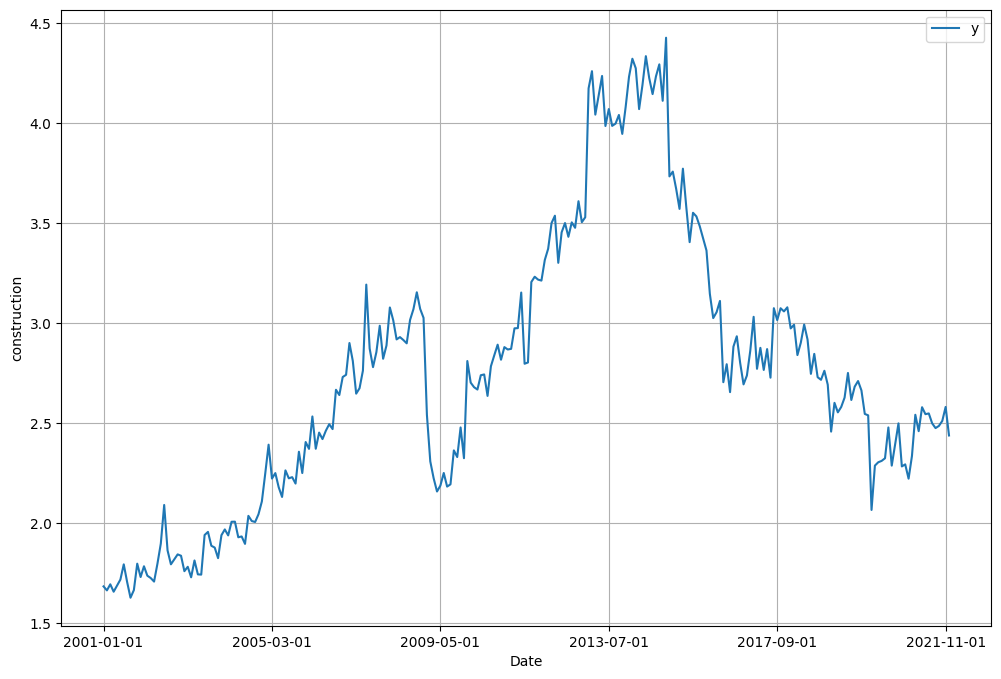

In [10]:
dataAC = pd.read_csv('Final.csv')
prophet_construction_breton = dataAC[dataAC['Station Name'] == 'Breton'][['Date', 'Construction']]
prophet_construction_breton.set_index('Date', inplace=True)
prophet_construction_breton=prophet_construction_breton.reset_index()
# Step 3: Preprocess data if needed (rename columns to 'ds' and 'y')
prophet_construction_breton.rename(columns={'Date': 'ds', 'Construction': 'y'}, inplace=True)
model = Prophet()
ax=prophet_construction_breton.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('construction')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [11]:
model.fit(prophet_construction_breton)


14:30:50 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,1.519257,1.257903,1.962026,1.519257,1.519257,0.086870,0.086870,0.086870,0.086870,0.086870,0.086870,0.0,0.0,0.0,1.606127
1,2001-02-01,1.532513,1.289857,1.987948,1.532513,1.532513,0.103395,0.103395,0.103395,0.103395,0.103395,0.103395,0.0,0.0,0.0,1.635909
2,2001-03-01,1.544487,1.205530,1.900065,1.544487,1.544487,0.015117,0.015117,0.015117,0.015117,0.015117,0.015117,0.0,0.0,0.0,1.559604
3,2001-04-01,1.557744,1.200703,1.907406,1.557744,1.557744,-0.001662,-0.001662,-0.001662,-0.001662,-0.001662,-0.001662,0.0,0.0,0.0,1.556082
4,2001-05-01,1.570574,1.212045,1.918455,1.570574,1.570574,0.000821,0.000821,0.000821,0.000821,0.000821,0.000821,0.0,0.0,0.0,1.571395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,2.002063,1.656536,2.404209,1.995521,2.009578,0.041184,0.041184,0.041184,0.041184,0.041184,0.041184,0.0,0.0,0.0,2.043247
260,2022-09-01,1.984826,1.671779,2.377841,1.976549,1.994262,0.032046,0.032046,0.032046,0.032046,0.032046,0.032046,0.0,0.0,0.0,2.016873
261,2022-10-01,1.968146,1.654897,2.396405,1.957868,1.979496,0.054155,0.054155,0.054155,0.054155,0.054155,0.054155,0.0,0.0,0.0,2.022301
262,2022-11-01,1.950910,1.644224,2.357225,1.938814,1.964349,0.053231,0.053231,0.053231,0.053231,0.053231,0.053231,0.0,0.0,0.0,2.004141


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


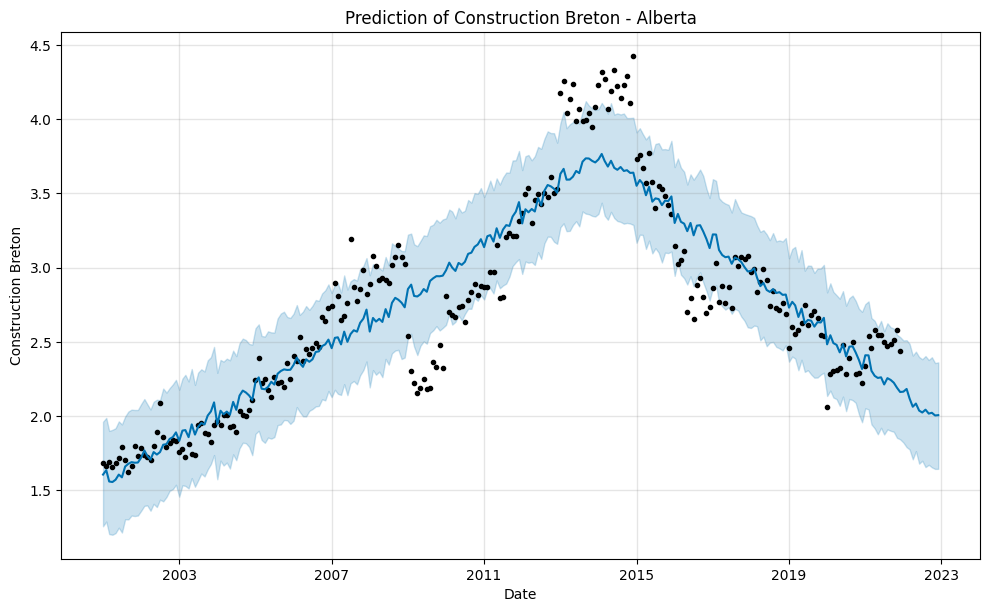

RMSE: 0.27796966377228344
MAE: 0.21222266945928692
MSE: 0.07726713397767632


In [13]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Construction Breton - Alberta")
plt.xlabel("Date")
plt.ylabel("Construction Breton")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_construction_breton['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Stavely Transportation

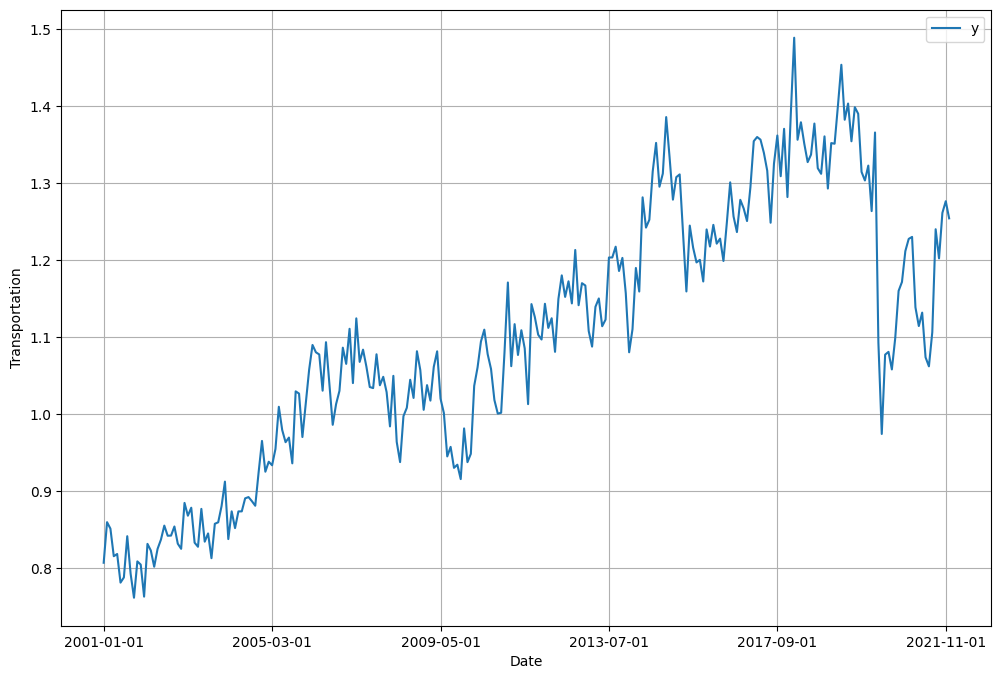

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataAT = pd.read_csv('Final.csv')

# Filter data for the specified station and column
prophet_transportation_stavely = dataAT[dataAT['Station Name'] == 'Stavely'][['Date', 'Transportation']]

# Rename columns to 'ds' and 'y'
prophet_transportation_stavely.rename(columns={'Date': 'ds', 'Transportation': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_transportation_stavely.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Transportation')
ax.set_xlabel('Date')
plt.grid()
plt.show()

# Fit the model




In [15]:
model.fit(prophet_transportation_stavely)


14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,0.781430,0.709531,0.869597,0.781430,0.781430,0.008457,0.008457,0.008457,0.008457,0.008457,0.008457,0.0,0.0,0.0,0.789887
1,2001-02-01,0.784491,0.733028,0.907948,0.784491,0.784491,0.035847,0.035847,0.035847,0.035847,0.035847,0.035847,0.0,0.0,0.0,0.820338
2,2001-03-01,0.787256,0.713803,0.881182,0.787256,0.787256,0.010219,0.010219,0.010219,0.010219,0.010219,0.010219,0.0,0.0,0.0,0.797475
3,2001-04-01,0.790317,0.708649,0.876617,0.790317,0.790317,0.000755,0.000755,0.000755,0.000755,0.000755,0.000755,0.0,0.0,0.0,0.791072
4,2001-05-01,0.793280,0.716384,0.879278,0.793280,0.793280,0.003062,0.003062,0.003062,0.003062,0.003062,0.003062,0.0,0.0,0.0,0.796342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,1.160857,1.097483,1.258543,1.159463,1.162447,0.016514,0.016514,0.016514,0.016514,0.016514,0.016514,0.0,0.0,0.0,1.177370
260,2022-09-01,1.158209,1.071252,1.242489,1.156425,1.160295,0.003192,0.003192,0.003192,0.003192,0.003192,0.003192,0.0,0.0,0.0,1.161402
261,2022-10-01,1.155647,1.073986,1.243994,1.153428,1.158166,0.003821,0.003821,0.003821,0.003821,0.003821,0.003821,0.0,0.0,0.0,1.159469
262,2022-11-01,1.153000,1.082581,1.244576,1.150397,1.155999,0.006132,0.006132,0.006132,0.006132,0.006132,0.006132,0.0,0.0,0.0,1.159132


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


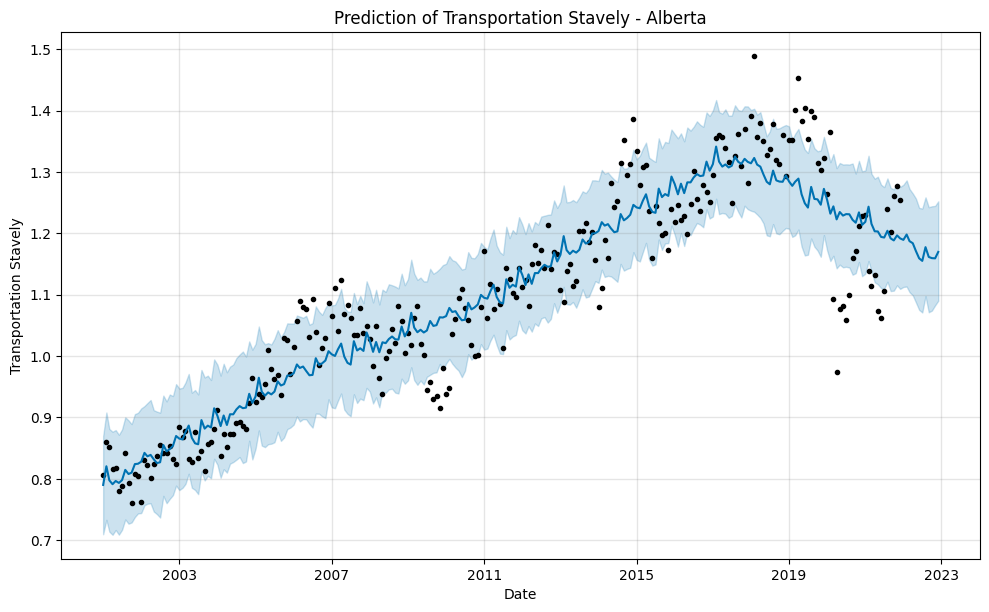

RMSE: 0.06509509108647935
MAE: 0.05029169262682514
MSE: 0.004237370883557043


In [17]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Transportation Stavely - Alberta")
plt.xlabel("Date")
plt.ylabel("Transportation Stavely")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_transportation_stavely['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

## Milk River Agriculture

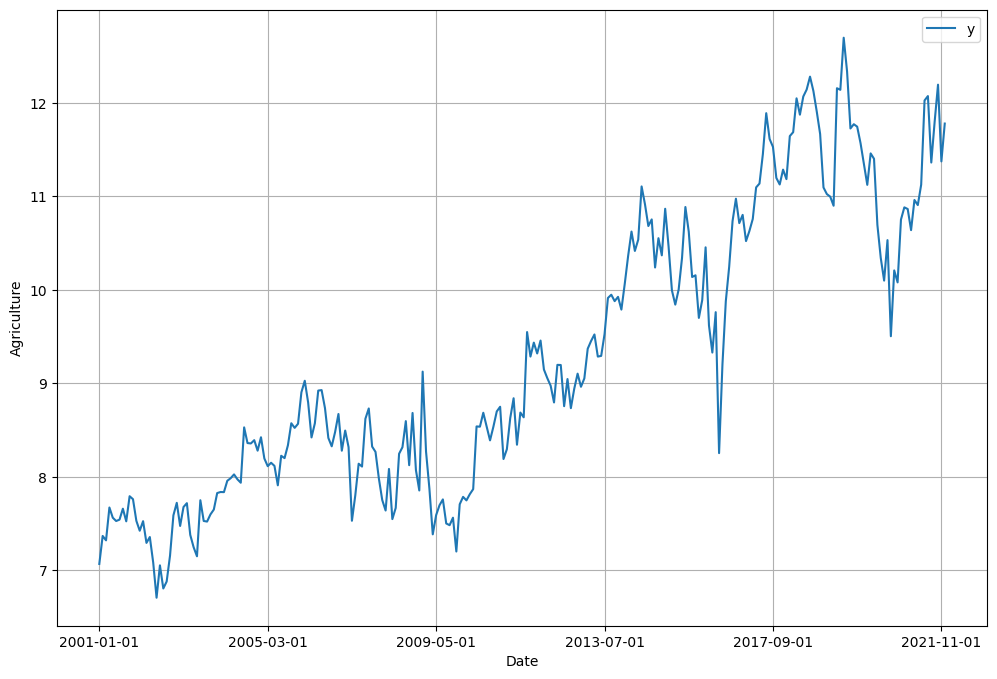

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataMA = pd.read_csv('Final.csv')

# Filter data for the specified station and column
prophet_agriculture_Milkriver = dataMA[dataMA['Station Name'] == 'Milk River'][['Date', 'Agriculture']]

# Reset index to avoid issues with Prophet
prophet_agriculture_Milkriver.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_agriculture_Milkriver.rename(columns={'Date': 'ds', 'Agriculture': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_agriculture_Milkriver.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Agriculture')
ax.set_xlabel('Date')
plt.grid()
plt.show()



In [19]:

model.fit(prophet_agriculture_Milkriver)


14:30:55 - cmdstanpy - INFO - Chain [1] start processing
14:30:55 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,7.303177,6.673811,8.007485,7.303177,7.303177,0.045447,0.045447,0.045447,0.045447,0.045447,0.045447,0.0,0.0,0.0,7.348625
1,2001-02-01,7.316951,6.778045,8.085602,7.316951,7.316951,0.098061,0.098061,0.098061,0.098061,0.098061,0.098061,0.0,0.0,0.0,7.415013
2,2001-03-01,7.329392,6.626596,7.934586,7.329392,7.329392,-0.040804,-0.040804,-0.040804,-0.040804,-0.040804,-0.040804,0.0,0.0,0.0,7.288589
3,2001-04-01,7.343166,6.569416,7.913805,7.343166,7.343166,-0.084647,-0.084647,-0.084647,-0.084647,-0.084647,-0.084647,0.0,0.0,0.0,7.258520
4,2001-05-01,7.356496,6.582820,7.871503,7.356496,7.356496,-0.152032,-0.152032,-0.152032,-0.152032,-0.152032,-0.152032,0.0,0.0,0.0,7.204464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,11.483151,10.973536,12.305191,11.472812,11.494530,0.139699,0.139699,0.139699,0.139699,0.139699,0.139699,0.0,0.0,0.0,11.622849
260,2022-09-01,11.490323,10.886473,12.218541,11.477668,11.504264,0.086758,0.086758,0.086758,0.086758,0.086758,0.086758,0.0,0.0,0.0,11.577081
261,2022-10-01,11.497264,10.939681,12.292967,11.481284,11.514673,0.099144,0.099144,0.099144,0.099144,0.099144,0.099144,0.0,0.0,0.0,11.596408
262,2022-11-01,11.504437,10.944127,12.244605,11.484888,11.525089,0.059813,0.059813,0.059813,0.059813,0.059813,0.059813,0.0,0.0,0.0,11.564249


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


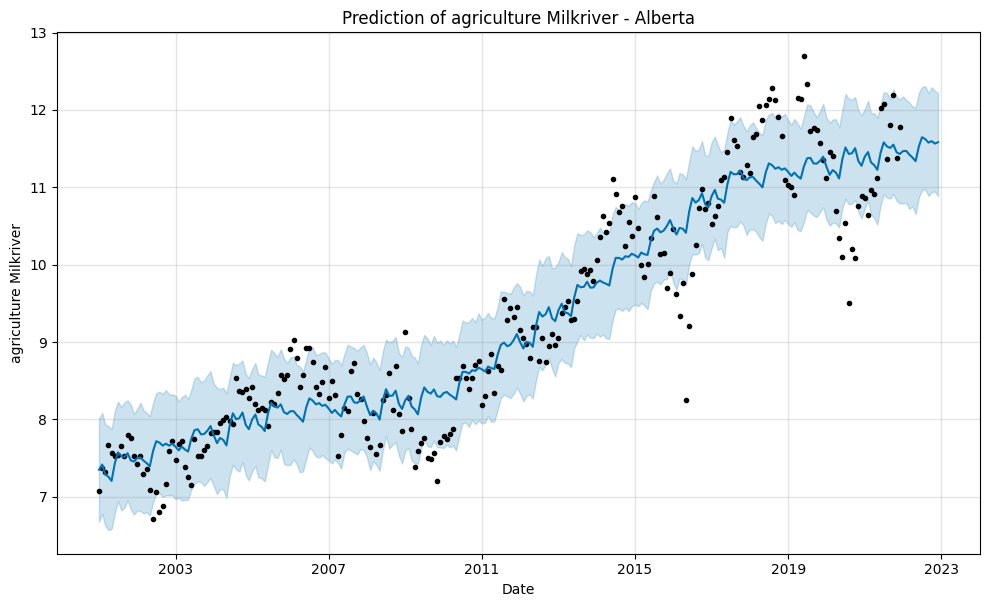

RMSE: 6.660375665500123
MAE: 6.534976101912335
MSE: 44.360604005586204


In [21]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of agriculture Milkriver - Alberta")
plt.xlabel("Date")
plt.ylabel("agriculture Milkriver")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_construction_breton['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# British Columbia

# Burns Lake Construction

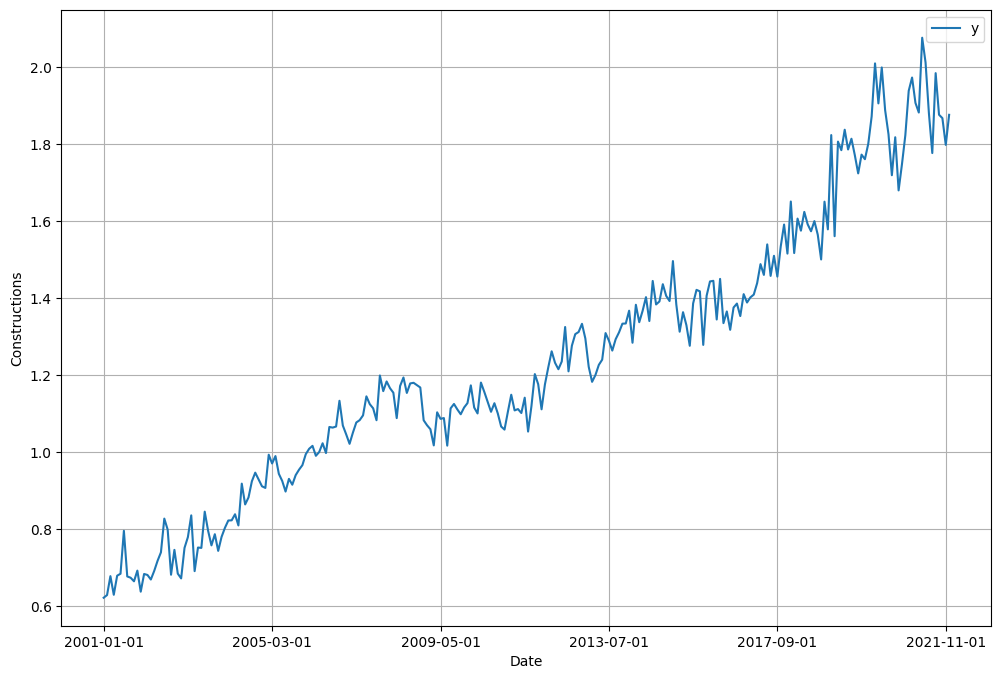

In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataBC = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_construction_burnslake = dataBC[dataBC['Station Name'] == 'Burns Lake'][['Date', 'Construction']]

# Rename columns to 'ds' and 'y'
prophet_construction_burnslake.rename(columns={'Date': 'ds', 'Construction': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_construction_burnslake.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Constructions')
ax.set_xlabel('Date')
plt.grid()
plt.show()
    

In [23]:

model.fit(prophet_construction_burnslake)


14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,0.628955,0.548734,0.707311,0.628955,0.628955,0.001438,0.001438,0.001438,0.001438,0.001438,0.001438,0.0,0.0,0.0,0.630392
1,2001-02-01,0.635072,0.532253,0.682837,0.635072,0.635072,-0.025647,-0.025647,-0.025647,-0.025647,-0.025647,-0.025647,0.0,0.0,0.0,0.609425
2,2001-03-01,0.640597,0.560547,0.718438,0.640597,0.640597,0.000851,0.000851,0.000851,0.000851,0.000851,0.000851,0.0,0.0,0.0,0.641448
3,2001-04-01,0.646715,0.590488,0.735998,0.646715,0.646715,0.014298,0.014298,0.014298,0.014298,0.014298,0.014298,0.0,0.0,0.0,0.661013
4,2001-05-01,0.652635,0.582690,0.734021,0.652635,0.652635,0.001688,0.001688,0.001688,0.001688,0.001688,0.001688,0.0,0.0,0.0,0.654322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,2.046647,1.974714,2.130551,2.044675,2.048578,0.004245,0.004245,0.004245,0.004245,0.004245,0.004245,0.0,0.0,0.0,2.050891
260,2022-09-01,2.055439,1.956401,2.120240,2.053067,2.057942,-0.017968,-0.017968,-0.017968,-0.017968,-0.017968,-0.017968,0.0,0.0,0.0,2.037471
261,2022-10-01,2.063947,1.966361,2.120162,2.060931,2.066939,-0.019550,-0.019550,-0.019550,-0.019550,-0.019550,-0.019550,0.0,0.0,0.0,2.044397
262,2022-11-01,2.072739,1.961124,2.122854,2.069240,2.076321,-0.024289,-0.024289,-0.024289,-0.024289,-0.024289,-0.024289,0.0,0.0,0.0,2.048451


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


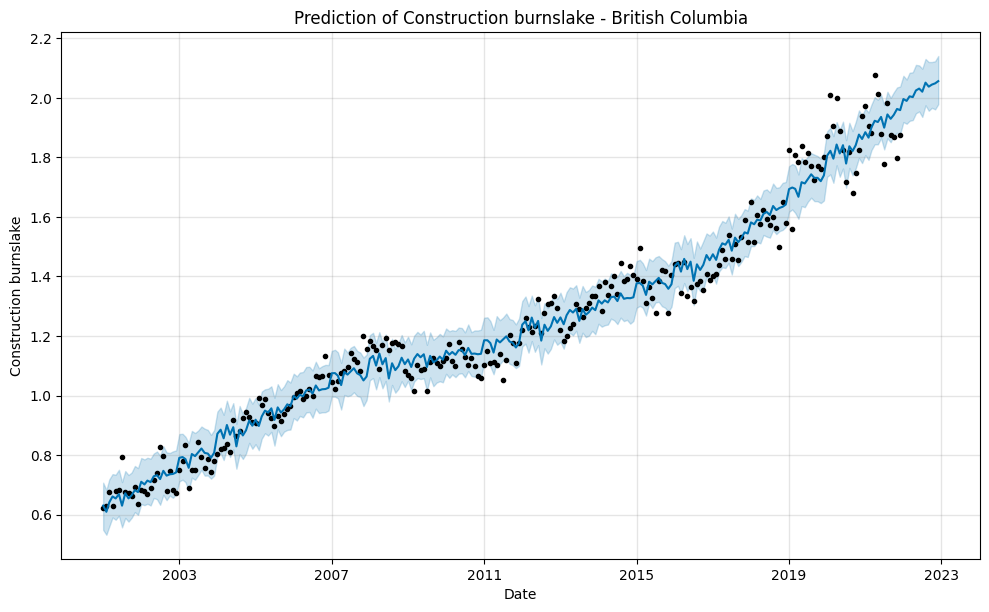

RMSE: 0.06024311112278542
MAE: 0.048507122786626125
MSE: 0.0036292324377522724


In [25]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Construction burnslake - British Columbia")
plt.xlabel("Date")
plt.ylabel("Construction burnslake")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_construction_burnslake['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Kootenay Transportation

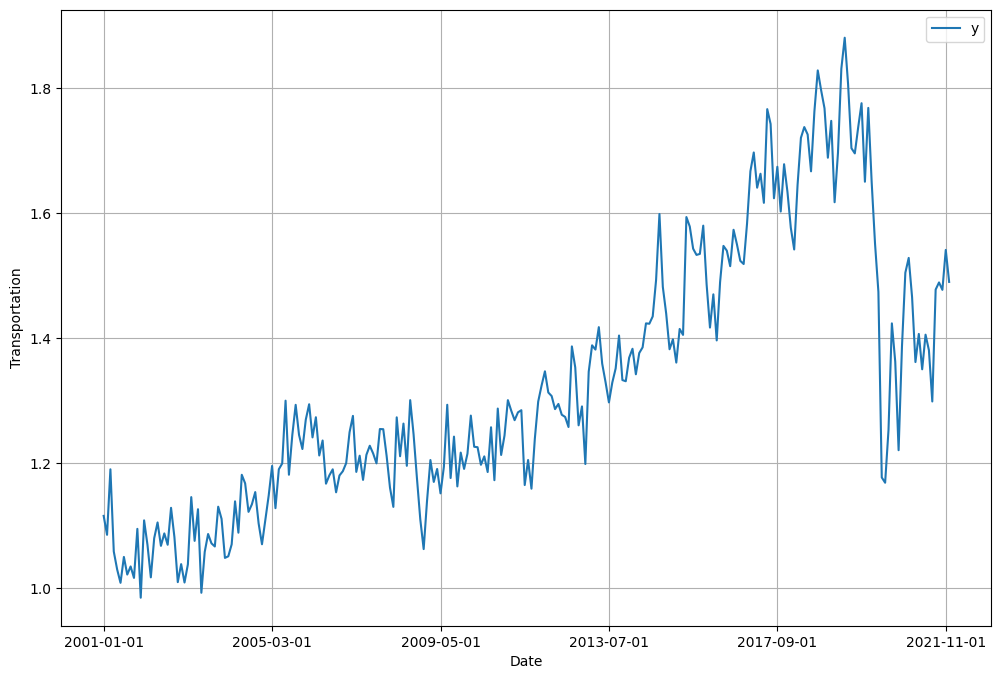

In [26]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataKT = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_transportation_kootenay = dataKT[dataKT['Station Name'] == 'Kootenay'][['Date', 'Transportation']]

# Rename columns to 'ds' and 'y'
prophet_transportation_kootenay.rename(columns={'Date': 'ds', 'Transportation': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_transportation_kootenay.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Transportation')
ax.set_xlabel('Date')
plt.grid()
plt.show()

In [27]:
model.fit(prophet_transportation_kootenay)


14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,1.033382,0.960225,1.185741,1.033382,1.033382,0.042631,0.042631,0.042631,0.042631,0.042631,0.042631,0.0,0.0,0.0,1.076013
1,2001-02-01,1.035155,0.976609,1.206320,1.035155,1.035155,0.054329,0.054329,0.054329,0.054329,0.054329,0.054329,0.0,0.0,0.0,1.089484
2,2001-03-01,1.036757,0.928277,1.147083,1.036757,1.036757,0.008152,0.008152,0.008152,0.008152,0.008152,0.008152,0.0,0.0,0.0,1.044909
3,2001-04-01,1.038530,0.933473,1.158113,1.038530,1.038530,0.006998,0.006998,0.006998,0.006998,0.006998,0.006998,0.0,0.0,0.0,1.045528
4,2001-05-01,1.040246,0.925180,1.142895,1.040246,1.040246,-0.001303,-0.001303,-0.001303,-0.001303,-0.001303,-0.001303,0.0,0.0,0.0,1.038943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,1.426308,1.327145,1.551169,1.423621,1.428299,0.012521,0.012521,0.012521,0.012521,0.012521,0.012521,0.0,0.0,0.0,1.438828
260,2022-09-01,1.423014,1.343290,1.559297,1.419717,1.425625,0.028355,0.028355,0.028355,0.028355,0.028355,0.028355,0.0,0.0,0.0,1.451369
261,2022-10-01,1.419827,1.336247,1.554806,1.415954,1.423083,0.037445,0.037445,0.037445,0.037445,0.037445,0.037445,0.0,0.0,0.0,1.457272
262,2022-11-01,1.416533,1.341659,1.563141,1.411760,1.420572,0.033710,0.033710,0.033710,0.033710,0.033710,0.033710,0.0,0.0,0.0,1.450243


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


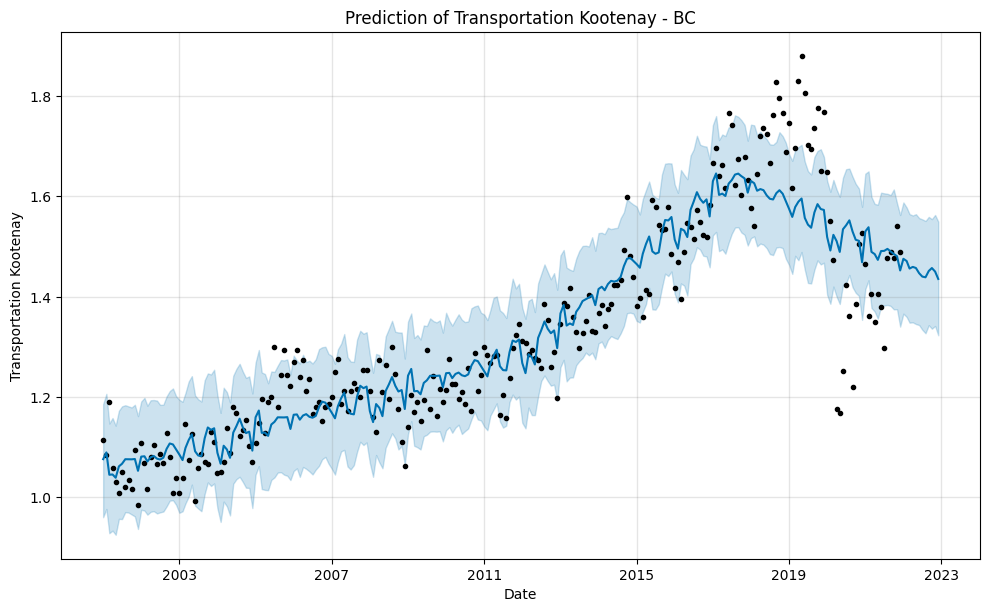

RMSE: 0.08632047379645313
MAE: 0.06270741324679112
MSE: 0.007451224196444151


In [29]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Transportation Kootenay - BC")
plt.xlabel("Date")
plt.ylabel("Transportation Kootenay")
plt.show()


predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_transportation_kootenay['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Pemberton Agriculture

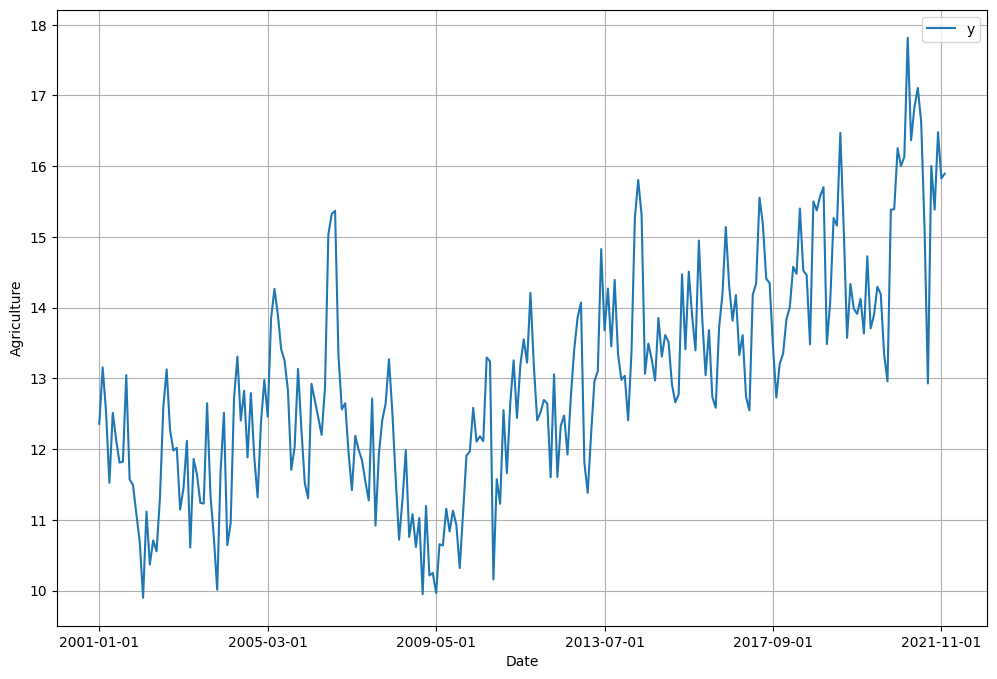

In [30]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataPB = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_agriculture_pemberton = dataPB[dataPB['Station Name'] == 'Pemberton'][['Date', 'Agriculture']]

# Reset index to avoid issues with Prophet
prophet_agriculture_pemberton.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_agriculture_pemberton.rename(columns={'Date': 'ds', 'Agriculture': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_agriculture_pemberton.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Agriculture')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [31]:
model.fit(prophet_agriculture_pemberton)


14:31:06 - cmdstanpy - INFO - Chain [1] start processing
14:31:06 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,11.936798,10.314397,12.891296,11.936798,11.936798,-0.314412,-0.314412,-0.314412,-0.314412,-0.314412,-0.314412,0.0,0.0,0.0,11.622386
1,2001-02-01,11.937727,10.303876,12.884446,11.937727,11.937727,-0.304692,-0.304692,-0.304692,-0.304692,-0.304692,-0.304692,0.0,0.0,0.0,11.633035
2,2001-03-01,11.938567,10.434151,13.028543,11.938567,11.938567,-0.261939,-0.261939,-0.261939,-0.261939,-0.261939,-0.261939,0.0,0.0,0.0,11.676628
3,2001-04-01,11.939497,10.584680,13.155229,11.939497,11.939497,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,0.0,0.0,0.0,11.946059
4,2001-05-01,11.940396,11.007480,13.527126,11.940396,11.940396,0.235292,0.235292,0.235292,0.235292,0.235292,0.235292,0.0,0.0,0.0,12.175688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,15.689317,14.576304,17.127697,15.685868,15.693457,0.127815,0.127815,0.127815,0.127815,0.127815,0.127815,0.0,0.0,0.0,15.817132
260,2022-09-01,15.713455,14.916455,17.451881,15.709134,15.718749,0.370587,0.370587,0.370587,0.370587,0.370587,0.370587,0.0,0.0,0.0,16.084043
261,2022-10-01,15.736815,14.547960,16.908846,15.731658,15.743327,0.046984,0.046984,0.046984,0.046984,0.046984,0.046984,0.0,0.0,0.0,15.783798
262,2022-11-01,15.760953,14.532934,17.039230,15.754694,15.769068,-0.019141,-0.019141,-0.019141,-0.019141,-0.019141,-0.019141,0.0,0.0,0.0,15.741812


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


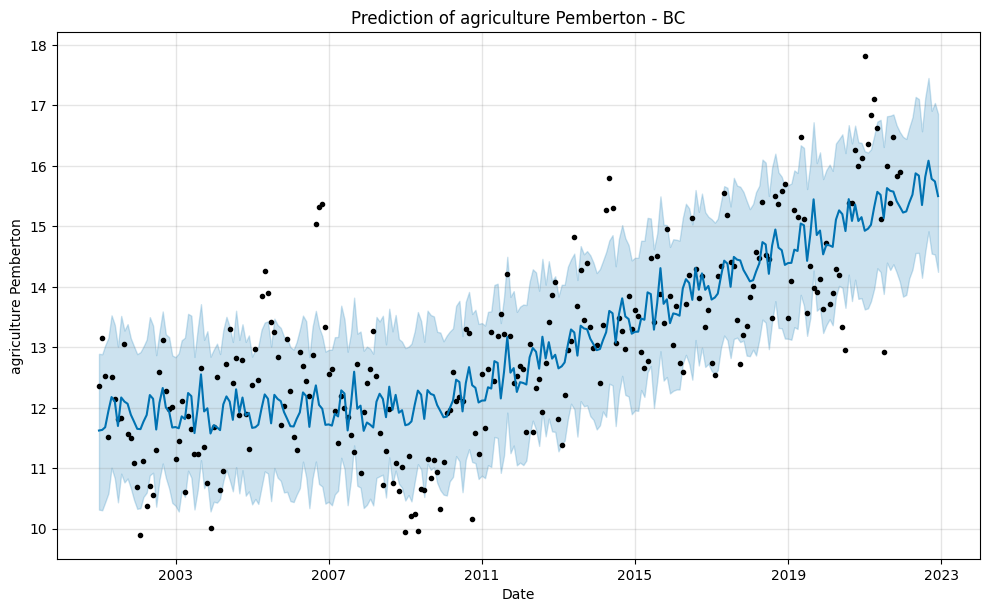

RMSE: 0.9901841299849198
MAE: 0.7840787673266714
MSE: 0.9804646112739924


In [33]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of agriculture Pemberton - BC")
plt.xlabel("Date")
plt.ylabel("agriculture Pemberton")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_agriculture_pemberton['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# ONTARIO

# Dorion construction

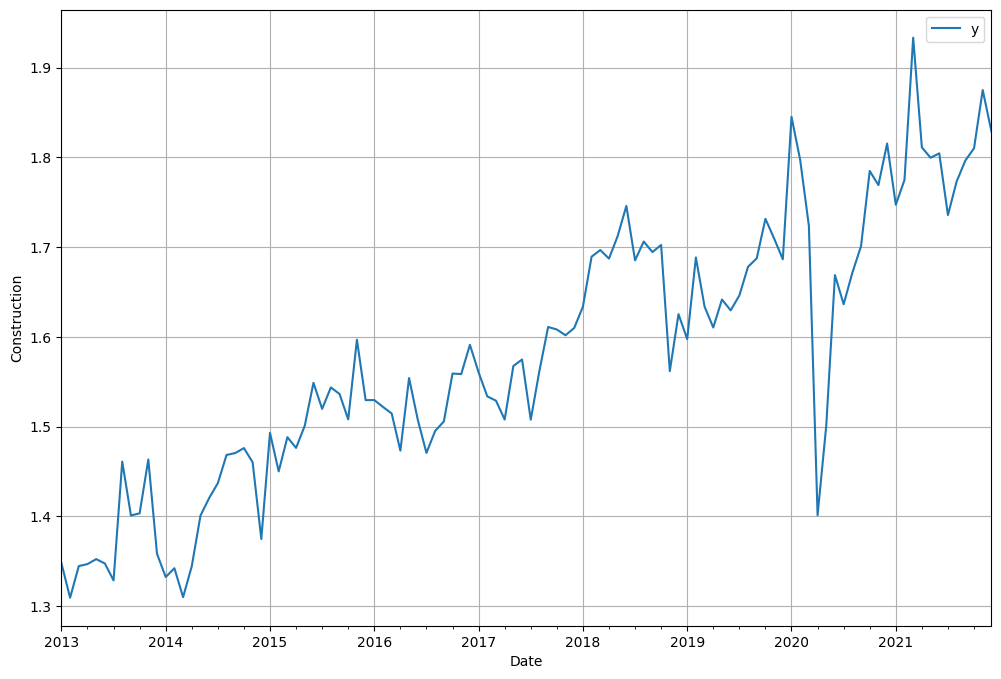

In [40]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataDP = pd.read_excel('FinalON.xlsx')

# Filter data for the specified station and column
prophet_construction_dorion = dataDP[dataDP['Station Name'] == 'Dorion'][['Date', 'Construction']]

# Rename columns to 'ds' and 'y'
prophet_construction_dorion.rename(columns={'Date': 'ds', 'Construction': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_construction_dorion.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Construction')
ax.set_xlabel('Date')
plt.grid()
plt.show()



In [41]:
model.fit(prophet_construction_dorion)


14:31:53 - cmdstanpy - INFO - Chain [1] start processing
14:31:53 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1.365859,1.259042,1.400686,1.365859,1.365859,-0.036832,-0.036832,-0.036832,-0.036832,-0.036832,-0.036832,0.0,0.0,0.0,1.329027
1,2013-02-01,1.370472,1.267319,1.409689,1.370472,1.370472,-0.029163,-0.029163,-0.029163,-0.029163,-0.029163,-0.029163,0.0,0.0,0.0,1.341308
2,2013-03-01,1.374638,1.311837,1.452805,1.374638,1.374638,0.005859,0.005859,0.005859,0.005859,0.005859,0.005859,0.0,0.0,0.0,1.380497
3,2013-04-01,1.379251,1.230862,1.366574,1.379251,1.379251,-0.076281,-0.076281,-0.076281,-0.076281,-0.076281,-0.076281,0.0,0.0,0.0,1.302970
4,2013-05-01,1.383715,1.279028,1.427589,1.383715,1.383715,-0.030682,-0.030682,-0.030682,-0.030682,-0.030682,-0.030682,0.0,0.0,0.0,1.353033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,1.855535,1.778615,1.918329,1.855255,1.855755,-0.005280,-0.005280,-0.005280,-0.005280,-0.005280,-0.005280,0.0,0.0,0.0,1.850255
116,2022-09-01,1.859871,1.786104,1.929598,1.859541,1.860142,-0.004654,-0.004654,-0.004654,-0.004654,-0.004654,-0.004654,0.0,0.0,0.0,1.855216
117,2022-10-01,1.864067,1.797906,1.946591,1.863674,1.864393,0.005372,0.005372,0.005372,0.005372,0.005372,0.005372,0.0,0.0,0.0,1.869439
118,2022-11-01,1.868402,1.803808,1.946374,1.867938,1.868778,0.004972,0.004972,0.004972,0.004972,0.004972,0.004972,0.0,0.0,0.0,1.873374


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


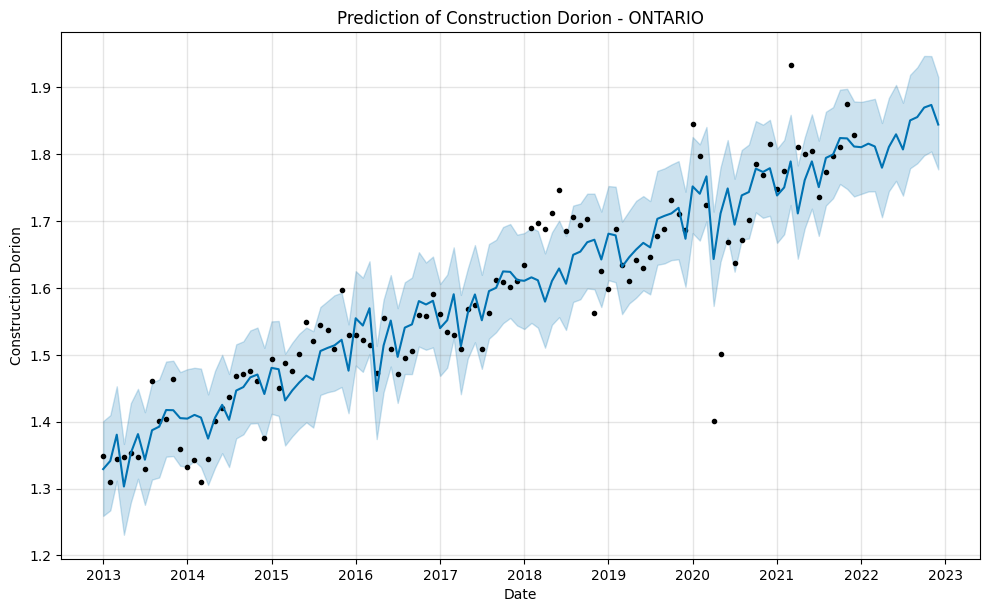

RMSE: 0.056790639100345174
MAE: 0.04132437202878559
MSE: 0.0032251766894256543


In [43]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Construction Dorion - ONTARIO")
plt.xlabel("Date")
plt.ylabel("Construction Dorion")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_construction_dorion['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Dorion Transportation

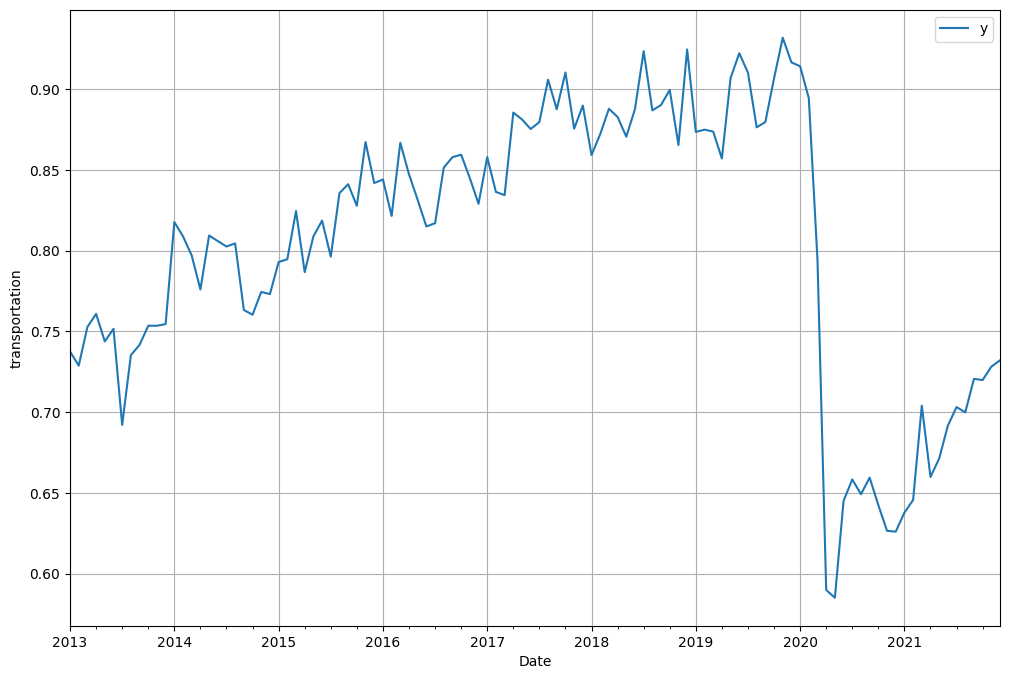

In [44]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataDT = pd.read_excel('FinalON.xlsx')

# Filter data for the specified station and column
prophet_transportation_dorion = dataDT[dataDT['Station Name'] == 'Dorion'][['Date', 'Transportation']]

# Rename columns to 'ds' and 'y'
prophet_transportation_dorion.rename(columns={'Date': 'ds', 'Transportation': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_transportation_dorion.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('transportation')
ax.set_xlabel('Date')
plt.grid()
plt.show()

In [45]:
model.fit(prophet_transportation_dorion)


14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,0.748121,0.681201,0.812368,0.748121,0.748121,-0.000751,-0.000751,-0.000751,-0.000751,-0.000751,-0.000751,0.0,0.0,0.0,0.747370
1,2013-02-01,0.750549,0.680513,0.808064,0.750549,0.750549,-0.005027,-0.005027,-0.005027,-0.005027,-0.005027,-0.005027,0.0,0.0,0.0,0.745522
2,2013-03-01,0.752742,0.702519,0.824000,0.752742,0.752742,0.009558,0.009558,0.009558,0.009558,0.009558,0.009558,0.0,0.0,0.0,0.762300
3,2013-04-01,0.755170,0.663181,0.793310,0.755170,0.755170,-0.026215,-0.026215,-0.026215,-0.026215,-0.026215,-0.026215,0.0,0.0,0.0,0.728955
4,2013-05-01,0.757520,0.673014,0.804251,0.757520,0.757520,-0.021405,-0.021405,-0.021405,-0.021405,-0.021405,-0.021405,0.0,0.0,0.0,0.736115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,0.594794,0.526281,0.657634,0.591457,0.598038,-0.002002,-0.002002,-0.002002,-0.002002,-0.002002,-0.002002,0.0,0.0,0.0,0.592793
116,2022-09-01,0.588054,0.523824,0.651929,0.583902,0.591969,-0.002723,-0.002723,-0.002723,-0.002723,-0.002723,-0.002723,0.0,0.0,0.0,0.585331
117,2022-10-01,0.581531,0.524387,0.645653,0.576393,0.586142,0.003287,0.003287,0.003287,0.003287,0.003287,0.003287,0.0,0.0,0.0,0.584818
118,2022-11-01,0.574791,0.517893,0.649840,0.568752,0.580413,0.006466,0.006466,0.006466,0.006466,0.006466,0.006466,0.0,0.0,0.0,0.581257


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


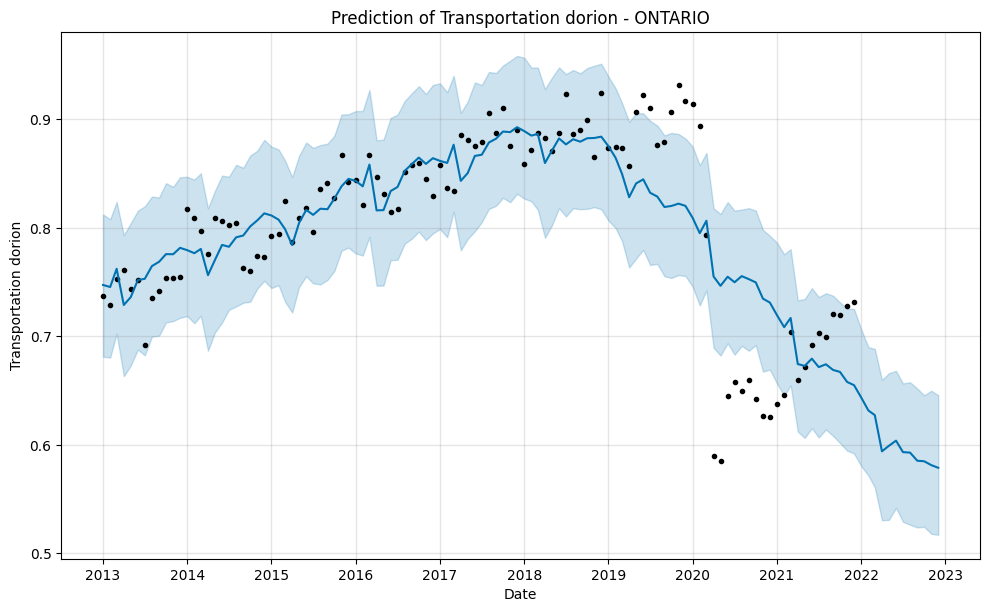

RMSE: 0.05003095140917908
MAE: 0.035406834362332835
MSE: 0.0025030960989076375


In [47]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Transportation dorion - ONTARIO")
plt.xlabel("Date")
plt.ylabel("Transportation dorion")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_transportation_dorion['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Moosone Agriculture

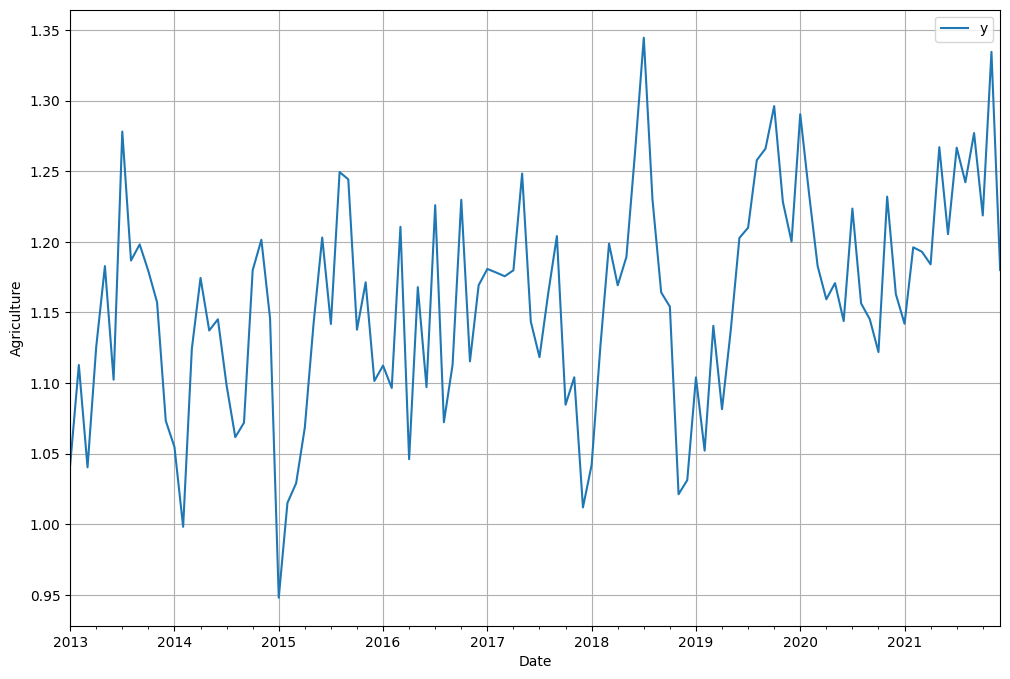

In [48]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataMO = pd.read_excel('FinalON.xlsx')

# Filter data for the specified station and column
prophet_agriculture_moosone = dataMO[dataMO['Station Name'] == 'Moosone'][['Date', 'Agriculture']]

# Reset index to avoid issues with Prophet
prophet_agriculture_moosone.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_agriculture_moosone.rename(columns={'Date': 'ds', 'Agriculture': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_agriculture_moosone.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Agriculture')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [49]:
model.fit(prophet_agriculture_moosone)


14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1.127738,0.963886,1.118464,1.127738,1.127738,-0.088181,-0.088181,-0.088181,-0.088181,-0.088181,-0.088181,0.0,0.0,0.0,1.039557
1,2013-02-01,1.128326,0.993459,1.141425,1.128326,1.128326,-0.056631,-0.056631,-0.056631,-0.056631,-0.056631,-0.056631,0.0,0.0,0.0,1.071695
2,2013-03-01,1.128858,1.035972,1.189627,1.128858,1.128858,-0.018358,-0.018358,-0.018358,-0.018358,-0.018358,-0.018358,0.0,0.0,0.0,1.110500
3,2013-04-01,1.129446,1.018349,1.163651,1.129446,1.129446,-0.038133,-0.038133,-0.038133,-0.038133,-0.038133,-0.038133,0.0,0.0,0.0,1.091313
4,2013-05-01,1.130015,1.074265,1.221679,1.130015,1.130015,0.018844,0.018844,0.018844,0.018844,0.018844,0.018844,0.0,0.0,0.0,1.148859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,1.236912,1.181663,1.330170,1.236641,1.237160,0.017232,0.017232,0.017232,0.017232,0.017232,0.017232,0.0,0.0,0.0,1.254144
116,2022-09-01,1.238160,1.173364,1.330575,1.237828,1.238463,0.017097,0.017097,0.017097,0.017097,0.017097,0.017097,0.0,0.0,0.0,1.255257
117,2022-10-01,1.239368,1.161543,1.316009,1.238971,1.239728,0.002138,0.002138,0.002138,0.002138,0.002138,0.002138,0.0,0.0,0.0,1.241506
118,2022-11-01,1.240616,1.153060,1.308995,1.240151,1.241041,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,0.0,0.0,0.0,1.233223


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


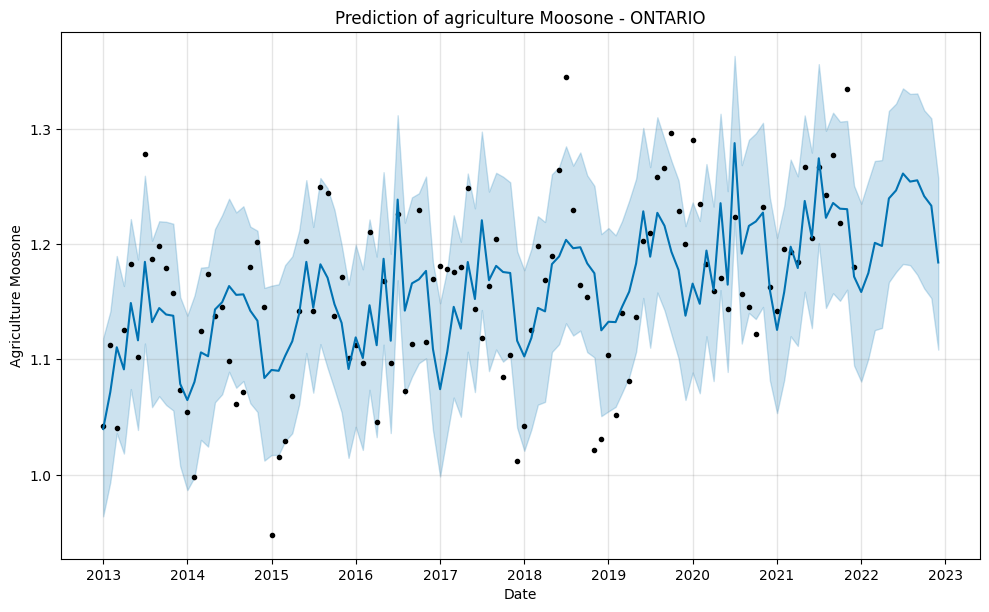

RMSE: 0.0585925132696037
MAE: 0.04652479232794969
MSE: 0.0034330826112486854


In [51]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of agriculture Moosone - ONTARIO")
plt.xlabel("Date")
plt.ylabel("Agriculture Moosone")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_agriculture_moosone['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# PEI

# St. Peters Bay Construction

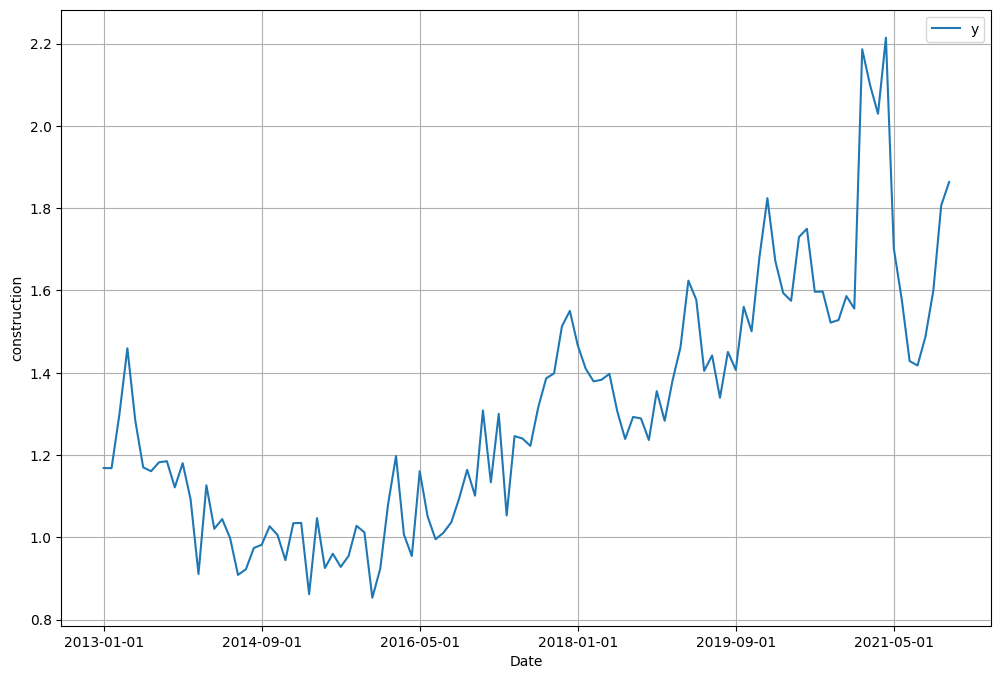

In [52]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataPP = pd.read_csv('FinalPE.csv')

# Filter data for the specified station and column
prophet_construction_stpeters = dataPP[dataPP['Station Name'] == 'St. Peters Bay'][['Date', 'Construction']]

# Rename columns to 'ds' and 'y'
prophet_construction_stpeters.rename(columns={'Date': 'ds', 'Construction': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_construction_stpeters.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('construction')
ax.set_xlabel('Date')
plt.grid()
plt.show()
    

In [53]:

model.fit(prophet_construction_stpeters)


14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1.102200,1.069716,1.409174,1.102200,1.102200,0.127108,0.127108,0.127108,0.127108,0.127108,0.127108,0.0,0.0,0.0,1.229308
1,2013-02-01,1.099683,1.034595,1.361950,1.099683,1.099683,0.097472,0.097472,0.097472,0.097472,0.097472,0.097472,0.0,0.0,0.0,1.197155
2,2013-03-01,1.097410,1.009520,1.325081,1.097410,1.097410,0.062797,0.062797,0.062797,0.062797,0.062797,0.062797,0.0,0.0,0.0,1.160207
3,2013-04-01,1.094894,1.002661,1.334626,1.094894,1.094894,0.074361,0.074361,0.074361,0.074361,0.074361,0.074361,0.0,0.0,0.0,1.169254
4,2013-05-01,1.092458,0.956117,1.297794,1.092458,1.092458,0.032671,0.032671,0.032671,0.032671,0.032671,0.032671,0.0,0.0,0.0,1.125129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,1.907227,1.681625,1.994346,1.901683,1.912840,-0.065177,-0.065177,-0.065177,-0.065177,-0.065177,-0.065177,0.0,0.0,0.0,1.842050
116,2022-09-01,1.918613,1.692033,2.028122,1.911806,1.925395,-0.056790,-0.056790,-0.056790,-0.056790,-0.056790,-0.056790,0.0,0.0,0.0,1.861823
117,2022-10-01,1.929631,1.727015,2.064853,1.921427,1.937567,-0.032726,-0.032726,-0.032726,-0.032726,-0.032726,-0.032726,0.0,0.0,0.0,1.896904
118,2022-11-01,1.941016,1.779110,2.090040,1.931526,1.950275,-0.009929,-0.009929,-0.009929,-0.009929,-0.009929,-0.009929,0.0,0.0,0.0,1.931087


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


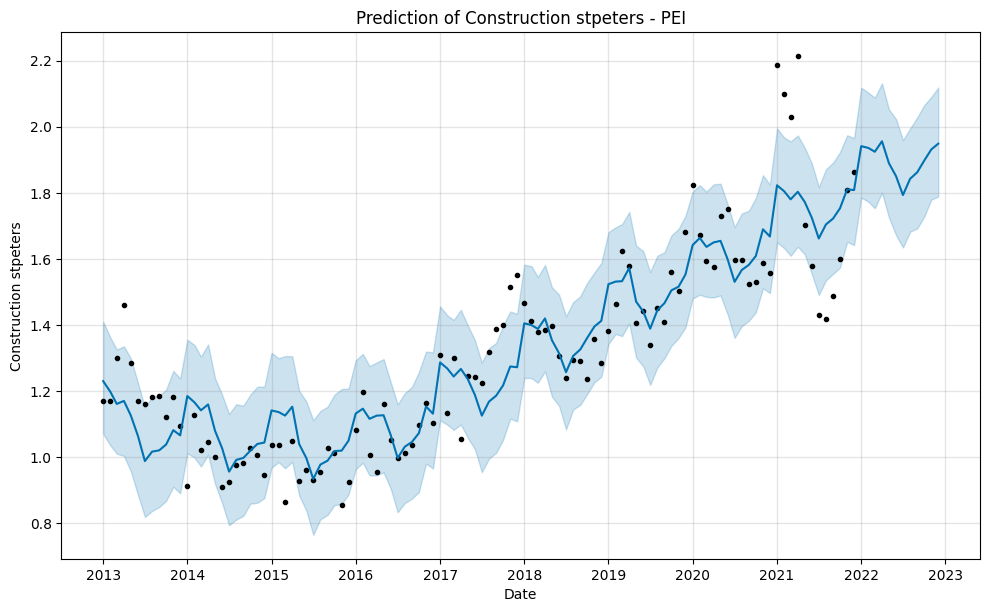

RMSE: 0.12955979334710446
MAE: 0.09629847940981882
MSE: 0.01678574005214441


In [55]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Construction stpeters - PEI")
plt.xlabel("Date")
plt.ylabel("Construction stpeters")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_construction_stpeters['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Summerside Transportation

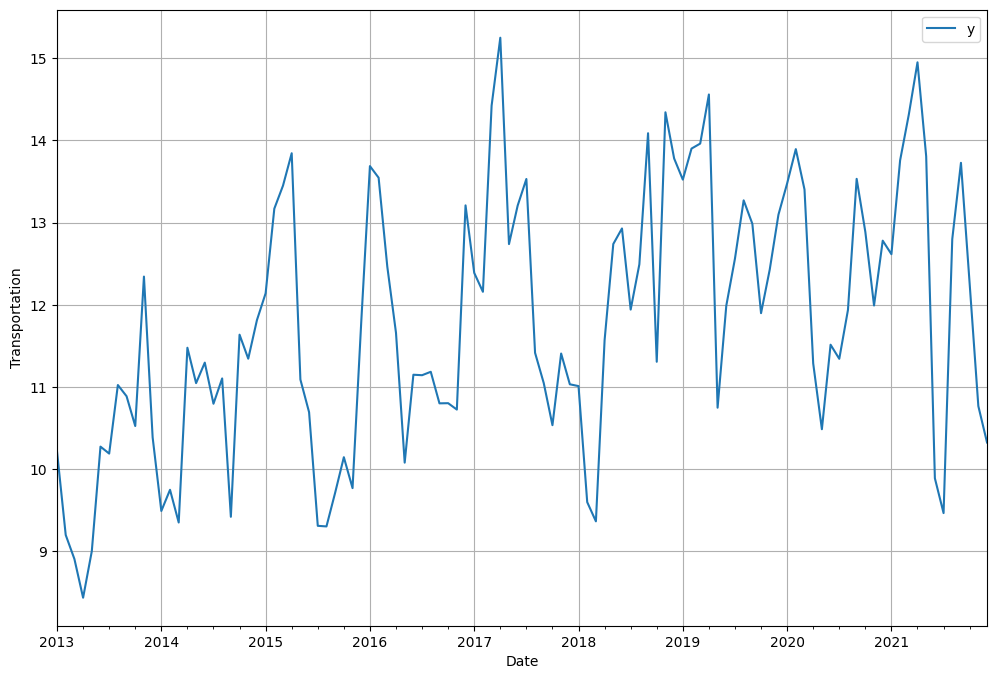

In [67]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataET = pd.read_excel('FinalPE.xlsx')

# Filter data for the specified station and column
prophet_transportation_Summerside = dataET[dataET['Station Name'] == 'Summerside'][['Date', 'Transportation']]

# Rename columns to 'ds' and 'y'
prophet_transportation_Summerside.rename(columns={'Date': 'ds', 'Transportation': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_transportation_Summerside.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Transportation')
ax.set_xlabel('Date')
plt.grid()
plt.show()

In [68]:
model.fit(prophet_transportation_Summerside)


14:41:03 - cmdstanpy - INFO - Chain [1] start processing
14:41:04 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,10.463962,8.711771,11.983142,10.463962,10.463962,-0.141602,-0.141602,-0.141602,-0.141602,-0.141602,-0.141602,0.0,0.0,0.0,10.322359
1,2013-02-01,10.499255,8.567359,11.823927,10.499255,10.499255,-0.216792,-0.216792,-0.216792,-0.216792,-0.216792,-0.216792,0.0,0.0,0.0,10.282463
2,2013-03-01,10.531134,9.312096,12.585779,10.531134,10.531134,0.459273,0.459273,0.459273,0.459273,0.459273,0.459273,0.0,0.0,0.0,10.990407
3,2013-04-01,10.566428,9.491178,12.692894,10.566428,10.566428,0.462032,0.462032,0.462032,0.462032,0.462032,0.462032,0.0,0.0,0.0,11.028460
4,2013-05-01,10.600583,8.231139,11.480934,10.600583,10.600583,-0.700697,-0.700697,-0.700697,-0.700697,-0.700697,-0.700697,0.0,0.0,0.0,9.899886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,13.298445,11.257404,14.537219,13.291454,13.305129,-0.439830,-0.439830,-0.439830,-0.439830,-0.439830,-0.439830,0.0,0.0,0.0,12.858614
116,2022-09-01,13.315090,11.456345,14.462142,13.306645,13.323133,-0.361636,-0.361636,-0.361636,-0.361636,-0.361636,-0.361636,0.0,0.0,0.0,12.953454
117,2022-10-01,13.331199,10.827678,14.023992,13.321309,13.340570,-0.866756,-0.866756,-0.866756,-0.866756,-0.866756,-0.866756,0.0,0.0,0.0,12.464443
118,2022-11-01,13.347845,11.270556,14.462470,13.336395,13.358937,-0.490580,-0.490580,-0.490580,-0.490580,-0.490580,-0.490580,0.0,0.0,0.0,12.857266


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


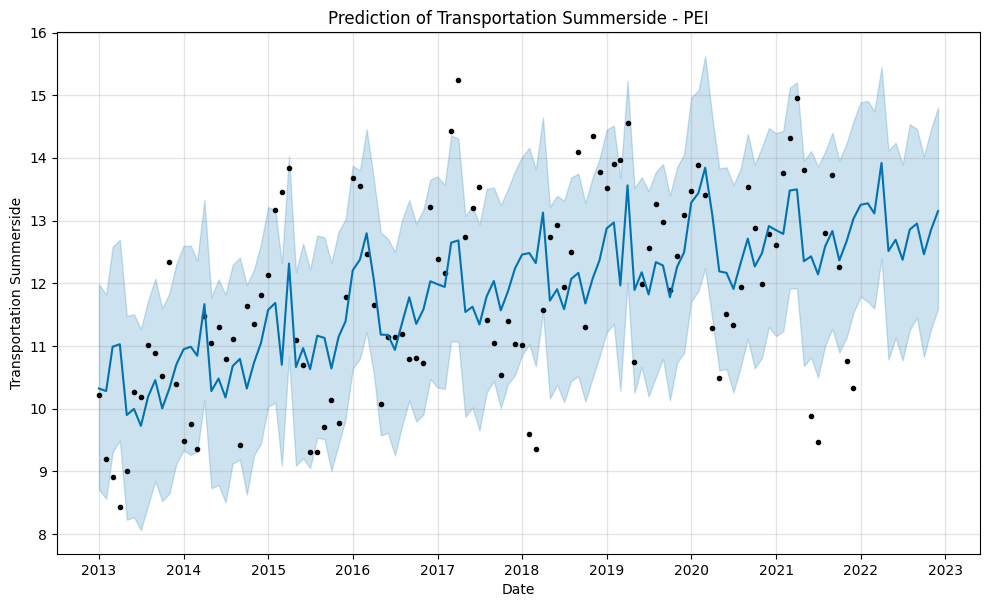

RMSE: 11.806532721995962
MAE: 11.769655888124573
MSE: 139.39421491556138


In [70]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Transportation Summerside - PEI")
plt.xlabel("Date")
plt.ylabel("Transportation Summerside")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_transportation_eastpoint['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# East Point Agriculture

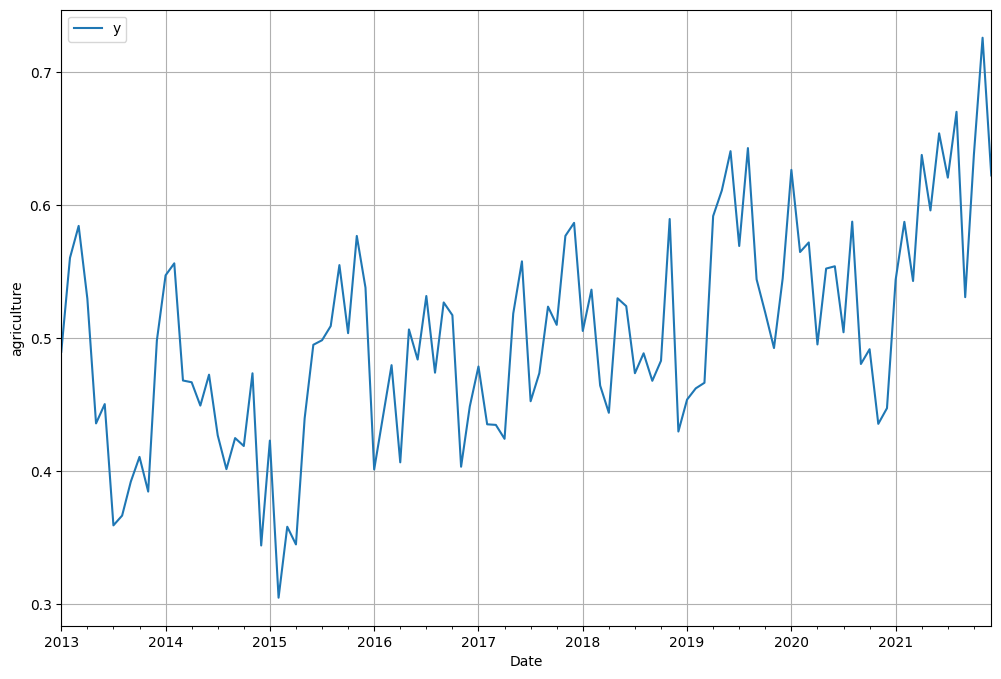

In [62]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataAT = pd.read_excel('FinalPE.xlsx')

# Filter data for the specified station and column
prophet_agriculture_eastpoint = dataAT[dataAT['Station Name'] == 'East Point'][['Date', 'Agriculture']]

# Reset index to avoid issues with Prophet
prophet_agriculture_eastpoint.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_agriculture_eastpoint.rename(columns={'Date': 'ds', 'Agriculture': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_agriculture_eastpoint.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('agriculture')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [63]:
model.fit(prophet_agriculture_eastpoint)


14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,0.423861,0.344717,0.499957,0.423861,0.423861,0.003658,0.003658,0.003658,0.003658,0.003658,0.003658,0.0,0.0,0.0,0.427519
1,2013-02-01,0.425338,0.345210,0.504095,0.425338,0.425338,0.001820,0.001820,0.001820,0.001820,0.001820,0.001820,0.0,0.0,0.0,0.427158
2,2013-03-01,0.426672,0.338017,0.494060,0.426672,0.426672,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,-0.010246,0.0,0.0,0.0,0.416426
3,2013-04-01,0.428148,0.334938,0.485159,0.428148,0.428148,-0.016953,-0.016953,-0.016953,-0.016953,-0.016953,-0.016953,0.0,0.0,0.0,0.411196
4,2013-05-01,0.429577,0.373036,0.525384,0.429577,0.429577,0.015525,0.015525,0.015525,0.015525,0.015525,0.015525,0.0,0.0,0.0,0.445102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,0.591720,0.520074,0.682035,0.591713,0.591726,0.008175,0.008175,0.008175,0.008175,0.008175,0.008175,0.0,0.0,0.0,0.599895
116,2022-09-01,0.593214,0.502647,0.657839,0.593206,0.593222,-0.011884,-0.011884,-0.011884,-0.011884,-0.011884,-0.011884,0.0,0.0,0.0,0.581331
117,2022-10-01,0.594661,0.506515,0.664520,0.594651,0.594670,-0.009463,-0.009463,-0.009463,-0.009463,-0.009463,-0.009463,0.0,0.0,0.0,0.585198
118,2022-11-01,0.596156,0.527571,0.681564,0.596144,0.596166,0.010981,0.010981,0.010981,0.010981,0.010981,0.010981,0.0,0.0,0.0,0.607137


C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


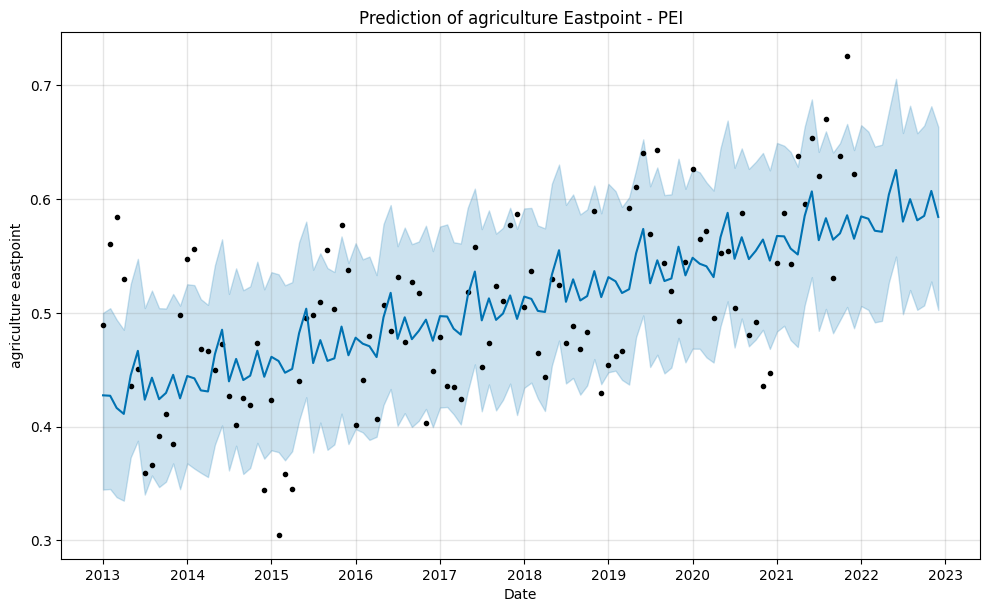

RMSE: 0.061948138771124504
MAE: 0.05120646146616303
MSE: 0.003837571897206499


In [65]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of agriculture Eastpoint - PEI")
plt.xlabel("Date")
plt.ylabel("agriculture eastpoint")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_agriculture_eastpoint['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)